In [8]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [36]:
name = '^NSEI'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="15m",period="60d")
df.to_csv('test1.csv')

In [37]:
df = pd.read_csv('test1.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [39]:
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-10-28 09:15:00+05:30,17756.400391,17805.550781,17748.800781,17795.300781,0,0,0
1,2022-10-28 09:30:00+05:30,17795.699219,17813.650391,17785.750000,17813.650391,0,0,0
2,2022-10-28 09:45:00+05:30,17813.750000,17823.000000,17777.050781,17799.449219,0,0,0
3,2022-10-28 10:00:00+05:30,17799.300781,17835.099609,17787.550781,17833.199219,0,0,0
4,2022-10-28 10:15:00+05:30,17832.949219,17838.699219,17814.449219,17815.449219,0,0,0
...,...,...,...,...,...,...,...,...
1496,2023-01-20 14:30:00+05:30,18051.500000,18053.550781,18019.099609,18023.800781,0,0,0
1497,2023-01-20 14:45:00+05:30,18023.800781,18056.000000,18023.300781,18049.400391,0,0,0
1498,2023-01-20 15:00:00+05:30,18050.400391,18054.250000,18020.050781,18029.349609,0,0,0
1499,2023-01-20 15:15:00+05:30,18029.449219,18032.750000,18017.449219,18027.300781,0,0,0


In [40]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
  return resistance

In [41]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))


In [42]:
def plot_all():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Datetime'][level[0]],\
               xmax=max(df['Datetime']),colors='blue')
  fig.show()

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'float'

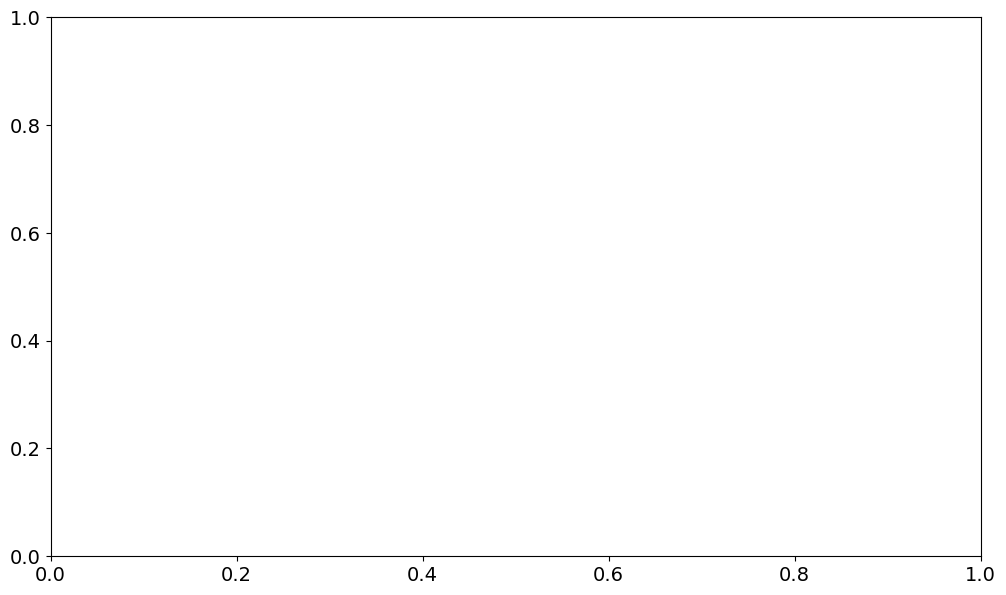

In [43]:
plot_all()

In [28]:
s =  np.mean(df['High'] - df['Low'])

In [29]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [30]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))
    

In [31]:
levels

[(4, 17838.69921875),
 (13, 17778.05078125),
 (18, 17724.0),
 (26, 17971.69921875),
 (31, 17937.650390625),
 (56, 18175.400390625),
 (76, 18102.05078125),
 (94, 18049.94921875),
 (150, 18254.349609375),
 (160, 18133.80078125),
 (202, 18011.25),
 (226, 18330.900390625),
 (277, 18282.849609375),
 (299, 18426.55078125),
 (311, 18386.150390625),
 (357, 18222.30078125),
 (475, 18528.44921875),
 (481, 18499.55078125),
 (518, 18614.099609375),
 (532, 18662.400390625),
 (575, 18886.69921875),
 (579, 18817.44921875),
 (587, 18855.69921875),
 (593, 18778.5),
 (604, 18690.0),
 (625, 18723.849609375),
 (664, 18585.650390625),
 (739, 18455.650390625),
 (996, 17883.599609375)]

/var/folders/tc/h6t4gn6x4ylcw_0r2xkk019w0000gn/T/ipykernel_55479/3123618144.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


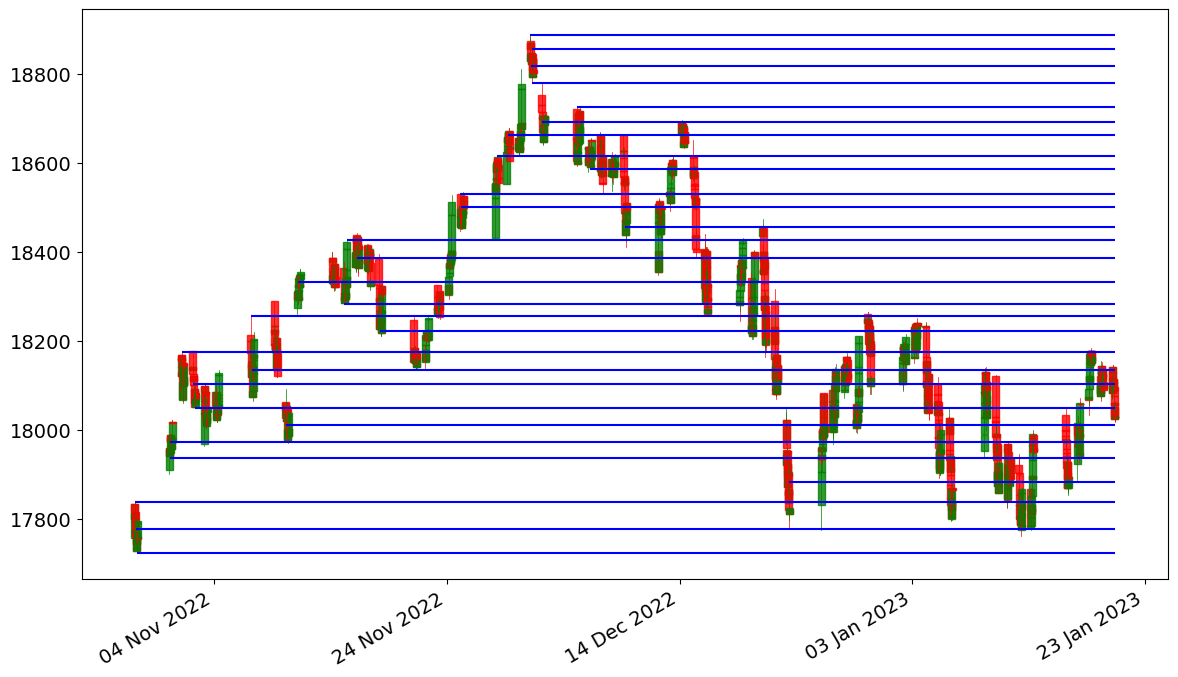

In [32]:
plot_all()